In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
import numpy as np 

In [3]:
IBMQ.load_account()

C:\Users\ssha9\Anaconda3\lib\site-packages\qiskit\providers\models\backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [15]:
# Create registers and circuit
a = QuantumRegister(2, 'a')  # input
qc = QuantumCircuit(a)

# All combinations of input
qc.h(a[0])
qc.x(a[1])
qc.cx(a[0],a[1])
    
# Measure the output
m = ClassicalRegister(2, 'output')
qc.add_register(m)
qc.measure(a,m)

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
print(result.get_statevector())

# Simulate and show results
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=500)  # shots default = 1024
result = job.result()
print(result.get_counts())

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
{'01': 241, '10': 259}


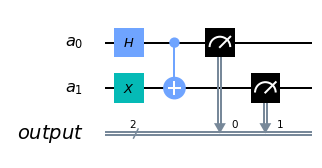

In [16]:
qc.draw(output='mpl')

In [21]:
# we have phase shift for [11] state. 

# Create registers and circuit
a = QuantumRegister(2, 'a')  # input
qc = QuantumCircuit(a)

# All combinations of input
qc.h(a[0])
qc.x(a[1])
qc.cu1(-np.pi/2,a[0],a[1])
    
# Measure the output
m = ClassicalRegister(2, 'output')
qc.add_register(m)
qc.measure(a,m)

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
print(result.get_statevector())

# Simulate and show results
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=500)  # shots default = 1024
result = job.result()
print(result.get_counts())

[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
{'10': 266, '11': 234}


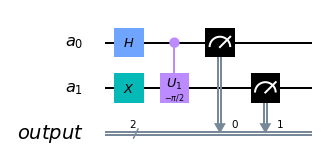

In [7]:
qc.draw(output='mpl')

# Alter circuits

In [7]:
# Create registers and circuit
a = QuantumRegister(2, 'a')  # input
qc = QuantumCircuit(a)

# All combinations of input
qc.x(a[1])
qc.h(a[0])
qc.cx(a[0],a[1])
qc.h(a)
    
# Measure the output
m = ClassicalRegister(2, 'output')
qc.add_register(m)
qc.measure(a,m)

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
print(result.get_statevector())

# Simulate and show results
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=500)  # shots default = 1024
result = job.result()
print(result.get_counts())

[ 0.+0.0000000e+00j  0.+0.0000000e+00j  0.+0.0000000e+00j
 -1.+1.2246468e-16j]
{'11': 249, '00': 251}


In [10]:
# Now, we can have the noticeable effects of the controlled operations

# Create registers and circuit
a = QuantumRegister(2, 'a')  # input
qc = QuantumCircuit(a)

# All combinations of input
qc.x(a[1])
qc.h(a[0])
qc.cu1(-np.pi/2,a[0],a[1])
qc.h(a)
    
# Measure the output
m = ClassicalRegister(2, 'output')
qc.add_register(m)
qc.measure(a,m)

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
print(result.get_statevector())

# Simulate and show results
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=500)  # shots default = 1024
result = job.result()
print(result.get_counts())

[0.        +0.j         0.70710678+0.70710678j 0.        +0.j
 0.        +0.j        ]
{'01': 135, '11': 117, '00': 137, '10': 111}


# Real Device

In [90]:
# Create registers and circuit
a = QuantumRegister(2, 'a')  # input
qc = QuantumCircuit(a)

# All combinations of input
qc.x(a[0])
qc.h(a[1])
qc.cx(a[0],a[1])
qc.h(a)
    
# Measure the output
m = ClassicalRegister(2, 'output')
qc.add_register(m)
qc.measure(a,m)

# Simulate and show results
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_ourense') 
job = execute(qc, backend, shots=500)  # shots default = 1024
result = job.result()
print(result.get_counts())

{'11': 4, '00': 253, '10': 7, '01': 236}


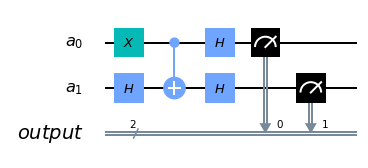

In [91]:
qc.draw(output='mpl')

In [89]:
# Create registers and circuit
a = QuantumRegister(2, 'a')  # input
qc = QuantumCircuit(a)

# All combinations of input
qc.x(a[0])
qc.h(a[1])
qc.cu1(-np.pi/2,a[0],a[1])
qc.h(a)
    
# Measure the output
m = ClassicalRegister(2, 'output')
qc.add_register(m)
qc.measure(a,m)

# Simulate and show results
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_ourense') 
job = execute(qc, backend, shots=500)  # shots default = 1024
result = job.result()
print(result.get_counts())

{'11': 104, '00': 132, '10': 120, '01': 144}


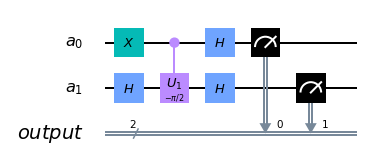

In [94]:
qc.draw(output='mpl')